Name: Lolly Saidyleigh
Student ID:WTF/2025/1934 ...
Email: Lollysaidy@outlook.com

In [1]:
import pandas as pd

df = pd.read_excel("HR_comma_sep 1.xlsx")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

### Employee Retention Distribution

From the analysis, 11,428 employees stayed while 3,571 employees left.  
This indicates that the majority of employees remain in the company, but a significant number still leave, which makes retention prediction important.

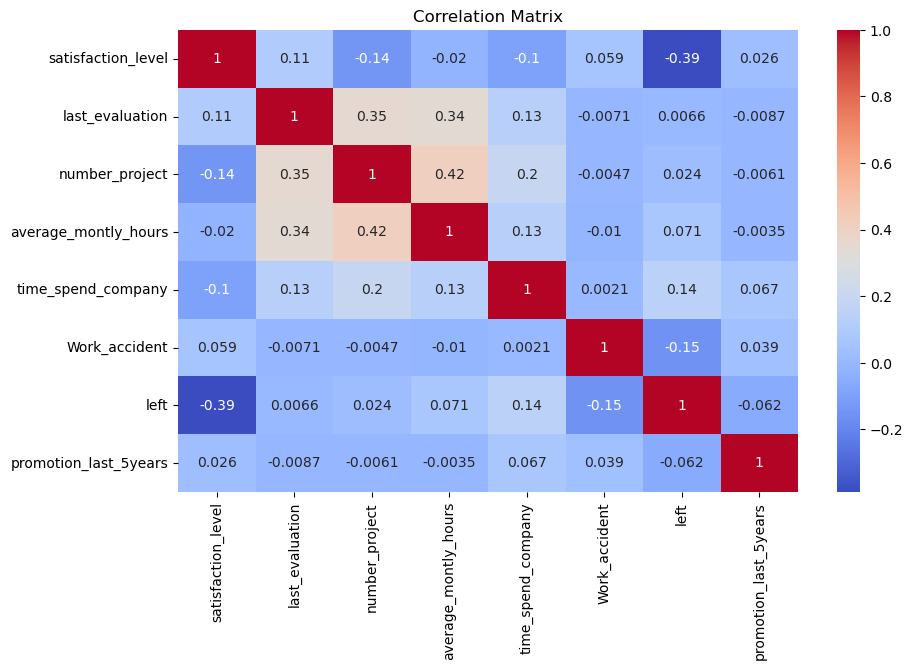

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Correlation Interpretation

From the heatmap, the variables most related to employee leaving (left) are:

- satisfaction_level (-0.39) → Strongest relationship. Lower satisfaction → higher chance of leaving.
- time_spend_company (0.14) → Employees who stay longer tend to leave more.
- Work_accident (-0.15) → Employees with accidents are slightly less likely to leave.
- average_monthly_hours (0.07) → Slight effect.
- number_project (0.02) → Very weak effect.

Therefore, the most important predictors of employee retention appear to be:
satisfaction_level, time_spend_company, and work_accident.

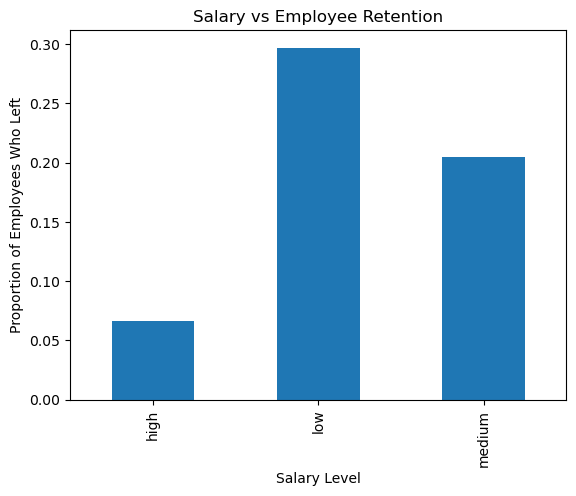

In [6]:
import matplotlib.pyplot as plt

salary_retention = df.groupby("salary")["left"].mean()

salary_retention.plot(kind="bar")
plt.title("Salary vs Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Proportion of Employees Who Left")
plt.show()

Employees with low salaries leave the most, while high-salary employees are the least likely to leave. This shows salary strongly influences retention.

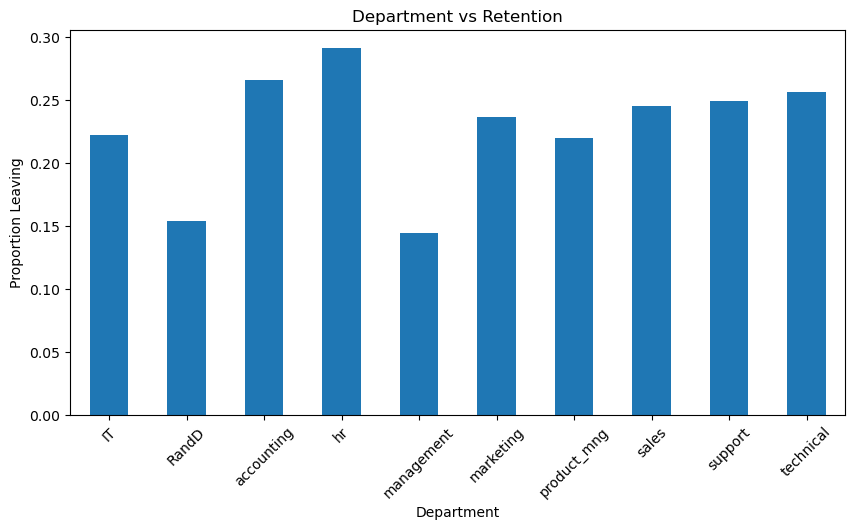

In [7]:
dept_retention = df.groupby("Department")["left"].mean()

dept_retention.plot(kind="bar", figsize=(10,5))
plt.title("Department vs Retention")
plt.xlabel("Department")
plt.ylabel("Proportion Leaving")
plt.xticks(rotation=45)
plt.show()

Some departments have higher turnover rates than others, indicating department assignment affects retention.

In [8]:
X = df[["satisfaction_level", "time_spend_company", "Work_accident"]]
y = df["left"]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.754


### Final Conclusion

From the analysis, employee satisfaction level is the strongest factor affecting retention. Employees with low satisfaction are significantly more likely to leave. Salary level and department also influence turnover, while work accidents and tenure show moderate effects.  

The logistic regression model confirmed these findings and achieved an accuracy of 75.4%, demonstrating that data analysis can effectively help organizations predict employee turnover and make informed HR decisions.